<a href="https://colab.research.google.com/github/Adeola-Jay/Text-Sentiment-Mining/blob/main/Hotel_Review_Text_%26_Sentiment_Mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Start with some simple example text
simple_text = 'This isn\'t a real text, this is an example text... Notice this contains punctuation!!'

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')

tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Remove stopwords

cleaned_tokens = []

for word in tokenized_document:
    word = word.lower()
if word not in stop_words:
    cleaned_tokens.append(word)

print(cleaned_tokens)

['punctuation']


In [ ]:
# we can also remove stopwords using list comprehension

cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]

print(cleaned_tokens)

['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [ ]:
# Explore lemmatization vs stemming

lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti', 'sings', 'hopped', 'rocks', 'better', 'easily']
pos = ['n','v','v','n','a','r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("lemmatized words:", lemmatized_words)
print("Stemmed words:", stemmed_words)



lemmatized words: ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words: ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [ ]:
# Now carry out stemming on our example sentence

stemmed_text = [stemmer.stem(word) for word in cleaned_tokens]

print(stemmed_text)


['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [ ]:
# Lets now create a function to apply all of our data preprocessing steps which we can then use on a corpus

def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text) #Tokenize
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words] #Remove
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens] #Stemming
    return stemmed_text

In [ ]:
data.isnull().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [ ]:
#data = pd.read_csv('tourist_accommodation_reviews MT.txt',sep='\t', header=None)

data = pd.read_csv('tourist_accommodation_reviews M.csv')

data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn575668561,Reviewed 3 weeks ago,Patong,Vista,Stayed at Avista Hideaway last week....Breakfa...
1,rn569439606,"Reviewed March 29, 2018",Patong,Vista,Great quality and variety of food and very fri...
2,rn565956322,"Reviewed March 11, 2018",Patong,Vista,The buffet breakfast offered good variety of A...
3,rn563155423,"Reviewed February 27, 2018",Patong,Vista,Had a very pleasant meal but did not realise t...
4,rn562060162,"Reviewed February 21, 2018",Patong,Vista,The staff is great and ready to help. The food...


In [ ]:
print('\n All Data Labels')
print(data.groupby("Review").count())



 All Data Labels
                                                    ID  Review Date  Location  \
Review                                                                          
'brill brekkie + scrummy suppers beyond - could...   1            1         1   
(Two Reviews - Breakfast first, Dinner further ...   1            1         1   
- these thai foods from this restaurant are wes...   1            1         1   
-They have a nice range of European or Western ...   1            1         1   
1.12.2015 I ordered to dinnet: Crab in Banana l...   1            1         1   
...                                                 ..          ...       ...   
wecafe is very cozy place very lovely with best...   1            1         1   
well, hmm. we tried it. seen better service and...   1            1         1   
went here and the food was.lovely\r\nwe.both ha...   1            1         1   
went out for dinner.my wife ordered a papaya sh...   1            1         1   
you are in

In [ ]:
data['Review'] = data['Review'].apply(preprocess_text)

data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn575668561,Reviewed 3 weeks ago,Patong,Vista,"[stay, avista, hideaway, last, week, breakfast..."
1,rn569439606,"Reviewed March 29, 2018",Patong,Vista,"[great, qualiti, varieti, food, friendli, staf..."
2,rn565956322,"Reviewed March 11, 2018",Patong,Vista,"[buffet, breakfast, offer, good, varieti, asia..."
3,rn563155423,"Reviewed February 27, 2018",Patong,Vista,"[pleasant, meal, realis, restaur, part, larg, ..."
4,rn562060162,"Reviewed February 21, 2018",Patong,Vista,"[staff, great, readi, help, food, delici, venu..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Review'].map(' '.join))
X = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
X.head()

,00,0080,0081,0082,0084,0085,0086,0089,008a,008b,...,youngest,your,yousefmor,yum,yummi,yummylici,yung,zap,zeeland,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

y = data['Review']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8,test_size=0.2,random_state=99)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This move is great!'))
print(sentiment.polarity_scores('This move is not great'))

{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'compound': 0.6588}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [ ]:
# Now lets read in our review data - we're going to use this for our analysis

reviews = pd.read_csv('tourist_accommodation_reviews M.csv')

reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn575668561,Reviewed 3 weeks ago,Patong,Vista,Stayed at Avista Hideaway last week....Breakfa...
1,rn569439606,"Reviewed March 29, 2018",Patong,Vista,Great quality and variety of food and very fri...
2,rn565956322,"Reviewed March 11, 2018",Patong,Vista,The buffet breakfast offered good variety of A...
3,rn563155423,"Reviewed February 27, 2018",Patong,Vista,Had a very pleasant meal but did not realise t...
4,rn562060162,"Reviewed February 21, 2018",Patong,Vista,The staff is great and ready to help. The food...


In [ ]:
reviews.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2992,2992,2992,2992,2992
unique,2952,1055,10,30,2952
top,rn447098449,Reviewed 1 week ago,Patong,Vista,We arrived at restaurant a group of 9 as they ...
freq,4,40,1200,100,4


In [ ]:
# We can extract the values from the dictionary and create new columns within our dataframe

reviews['compound'] = [sentiment.polarity_scores(Review)['compound'] for Review in reviews['Review']]
reviews['neg'] = [sentiment.polarity_scores(Review)['neg'] for Review in reviews['Review']]
reviews['neu'] = [sentiment.polarity_scores(Review)['neu'] for Review in reviews['Review']]
reviews['pos'] = [sentiment.polarity_scores(Review)['pos'] for Review in reviews['Review']]

In [ ]:
reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn575668561,Reviewed 3 weeks ago,Patong,Vista,Stayed at Avista Hideaway last week....Breakfa...,0.2023,0.000,0.956,0.044
1,rn569439606,"Reviewed March 29, 2018",Patong,Vista,Great quality and variety of food and very fri...,0.9476,0.000,0.635,0.365
2,rn565956322,"Reviewed March 11, 2018",Patong,Vista,The buffet breakfast offered good variety of A...,0.5859,0.000,0.858,0.142
3,rn563155423,"Reviewed February 27, 2018",Patong,Vista,Had a very pleasant meal but did not realise t...,0.6041,0.092,0.719,0.189
4,rn562060162,"Reviewed February 21, 2018",Patong,Vista,The staff is great and ready to help. The food...,0.9638,0.000,0.487,0.513


In [ ]:
reviews[['compound','neg', 'neu','pos']].describe()

,compound,neg,neu,pos
count,2992.000000,2992.000000,2992.000000,2992.000000
mean,0.643021,0.028044,0.742547,0.229410
std,0.439629,0.053969,0.123969,0.132698
min,-0.941300,0.000000,0.257000,0.000000
25%,0.571900,0.000000,0.660750,0.129000
50%,0.835650,0.000000,0.747000,0.221000
75%,0.922525,0.042000,0.835000,0.321000
max,0.991900,0.497000,1.000000,0.743000


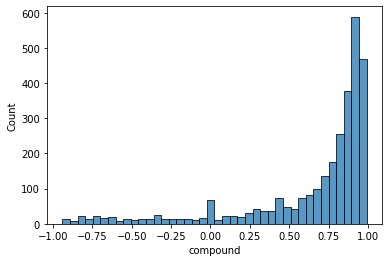

In [ ]:
sns.histplot(reviews['compound'])

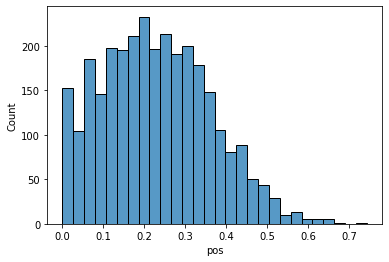

In [ ]:
sns.histplot(reviews['pos'])

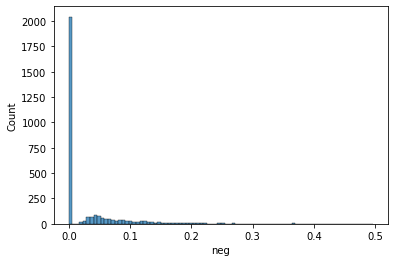

In [ ]:
sns.histplot(reviews['neg'])

In [ ]:
# Lets look at how many negative reviews we have per hotel or restaurant
(reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
Tropica Restaurant & Beer Garden                                 27
Tu Kab Khao Restaurant                                           11
Tunk-Ka Cafe                                                      5
Two Chefs - Karon Beach                                           4
Two Chefs Kata Beach                                              9
Two Chefs Kata Center                                            11
Two Chefs Patong                                                  4
Uncle Nan's Italian Restaurant                                   21
Up Seafood                                                       22
Uptown Restaurant                                                10
Urban food                                                       16
Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand     4
Veranda                                                          22
Vista                                                             7
Vitaporn                  

In [ ]:
# Calculate as percentage of total reviews

percent_negative = pd.DataFrame((reviews['compound']<=0).groupby(reviews['Hotel/Restaurant name']).sum()
                                /reviews['Hotel/Restaurant name'].groupby(reviews['Hotel/Restaurant name']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative        


,% negative reviews
Hotel/Restaurant name,
White Box Phuket,4.000000
Two Chefs - Karon Beach,4.000000
Two Chefs Patong,4.000000
"Vanilla Sky Bar & Gastro Pub - Cape Sienna - Phuket, Thailand",4.040404
Tunk-Ka Cafe,5.000000
WAI thai,5.000000
Ying Restaurant,6.000000
Vista,7.000000
We Cafe,8.000000


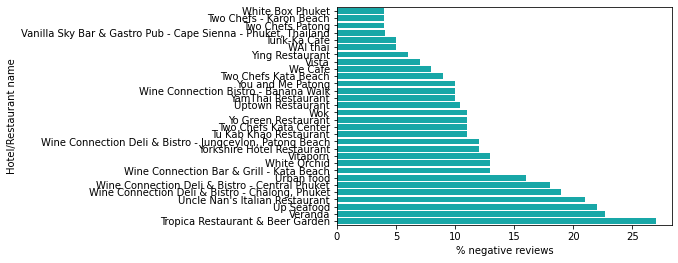

In [ ]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [ ]:
# Process the text data ready for wordcloud visualisation, using the function we defined earlier
 

reviews['processed_review'] = reviews['Review'].apply(preprocess_text)

reviews_positive_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='Vista')& (reviews['compound']>0),:]

reviews_negative_subset = reviews.loc[(reviews['Hotel/Restaurant name']=='Vista')& (reviews['compound']<=0),:]

reviews_positive_subset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_review
0,rn575668561,Reviewed 3 weeks ago,Patong,Vista,Stayed at Avista Hideaway last week....Breakfa...,0.2023,0.000,0.956,0.044,"[stay, avista, hideaway, last, week, breakfast..."
1,rn569439606,"Reviewed March 29, 2018",Patong,Vista,Great quality and variety of food and very fri...,0.9476,0.000,0.635,0.365,"[great, qualiti, varieti, food, friendli, staf..."
2,rn565956322,"Reviewed March 11, 2018",Patong,Vista,The buffet breakfast offered good variety of A...,0.5859,0.000,0.858,0.142,"[buffet, breakfast, offer, good, varieti, asia..."
3,rn563155423,"Reviewed February 27, 2018",Patong,Vista,Had a very pleasant meal but did not realise t...,0.6041,0.092,0.719,0.189,"[pleasant, meal, realis, restaur, part, larg, ..."
4,rn562060162,"Reviewed February 21, 2018",Patong,Vista,The staff is great and ready to help. The food...,0.9638,0.000,0.487,0.513,"[staff, great, readi, help, food, delici, venu..."


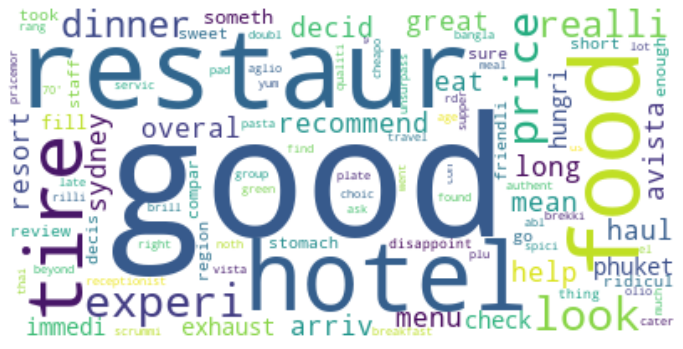

In [ ]:
# Wordcloud of words from negative reviews by hotel or restaurant

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
     ' '.join(neg_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow (wordcloud,  interpolation= 'bilinear')
plt.axis("off")
plt.show()


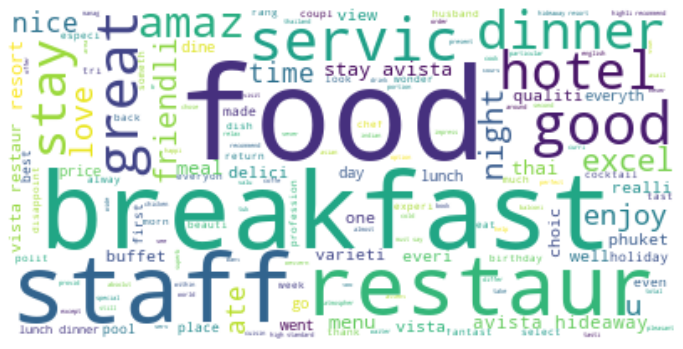

In [ ]:
# Wordcloud of words from positive reviews by hotel or restaurant

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,  interpolation= 'bilinear')
plt.axis("off")
plt.show()



In [ ]:
# Use nltk FreqDist and then tabulate

from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

     food breakfast   restaur     staff      stay    dinner    servic      good     great     hotel 
       61        40        40        40        33        31        27        27        25        22 


In [ ]:
# Use nltk FreqDist and then tabulate

from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

   good restaur   hotel    food    tire  experi    look      10   price  dinner 
      4       4       3       3       2       2       2       2       2       2 


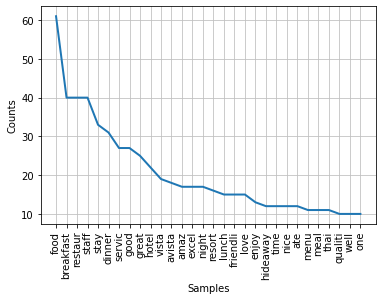

In [ ]:
pos_freqdist.plot(30)

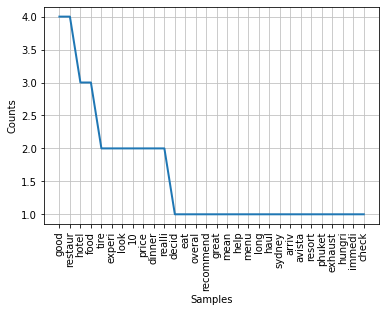

In [ ]:
neg_freqdist.plot(30)